# **Desafio: Sprint 03 - Resolução**

## **Desenvolvimento**


### **Etapa 1:**

**O que foi pedido:** Leia o arquivo csv [*googleplaystore.csv*](../../Sprint3/Desafio/googleplaystore.csv) e realize as seguintes atividades sobre o dataset utilizando as bibliotecas Pandas e Matplotlib. Remova as linhas duplicadas.

In [ ]:
import pandas as pd

# Lê o arquivo googlepalystore.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystore.csv')

# A variável dataset_limpo recebe o conteúdo de dataset SEM linhas duplicadas.
dataset_limpo = dataset.drop_duplicates()

# Remove duplicatas com o mesmo nome exato na coluna App.
dataset_limpo = dataset.drop_duplicates(subset='App')

# Crio outro arquivo para receber o googleplaystore.csv sem linhas duplicadados e nomeio ele como 'googleplaystoreAtt.csv' (Att = Atualizado).
dataset_limpo.to_csv('googleplaystoreAtt.csv', index=False)

**Resolução:** Após a execução com sucesso do código o arquivo [*googleplaystoreAtt.csv*](./Sprint3/Desafio/googleplaystoreAtt.csv), que basicamente, é o mesmo arquivo que o [*googleplaystore.csv*](./Sprint3/Desafio/googleplaystore.csv), mas SEM linhas duplicadas. O número de linhas duplicadas foram de 483, o arquivo orignal possui 10842 e o novo possui 10359 linhas. Mas ao chegar a etapa 6 notei que havia aplicativos com o mesmo todas as informações idênticas, exceto o seu número de reviews, o que me fez pensar que foram adicionadas ao .CSV por engano, então retirei todos os Apps com duplicados e só deixei uma versão, assim o .CSV atual ficou com 9661 linhas.

### **Etapa 2:**

**O que foi pedido:** Faça um gráfico de barras contendo os top 5 apps por número de instalação.

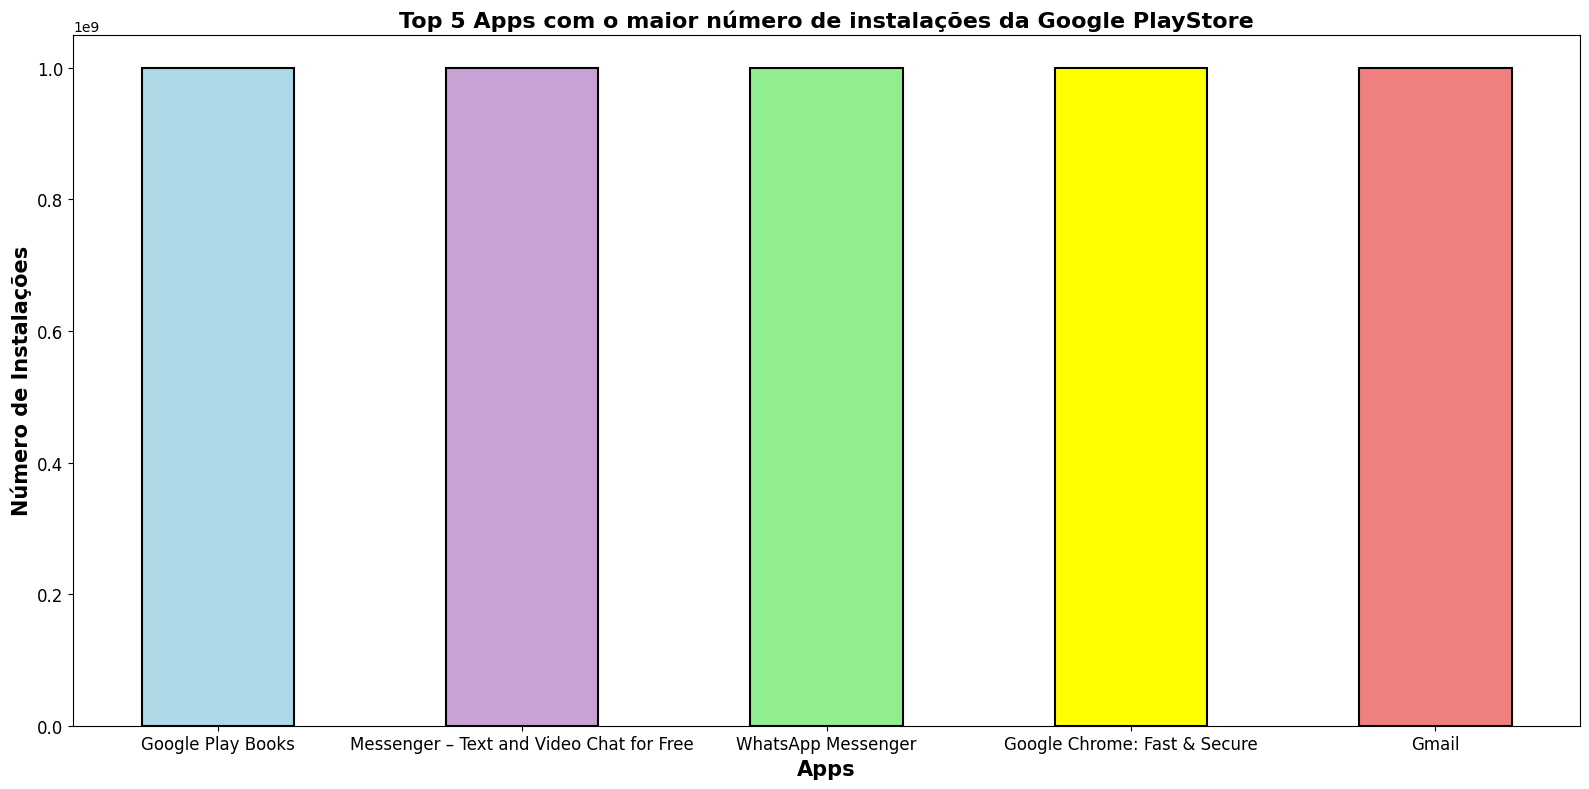

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Garante que não haverá caracteres especiais como +, substituindo-os por um espaço vazio, e depois verifica se é um número.
dataset = dataset[dataset['Installs'].str.replace('[+,]', '', regex=True).str.isdigit()]

# Faz basicamente a mesma coisa que o código anterior, mas garante que os valores serão convertidos para float.
dataset['Installs'] = dataset['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Armazena os 5 maiores valores da coluna Installs, na variável topCincoNumInstalacoes.
topCincoNumInstalacoes = dataset.nlargest(5, 'Installs')

# Crio um dicionário que tem como key o nome do app e o value como o número de instalações que app teve.
topCincoAppsMaisInstalacoes = dict(zip(topCincoNumInstalacoes['App'], topCincoNumInstalacoes['Installs']))

# # Defino a área do gráfico como 16x8.
plt.figure(figsize=(16, 8))

# Variável cores recebe cores que contém a identidade visual dos Apps encontrados.
cores = ['lightblue', '#C8A2D4', 'lightgreen', 'yellow', 'lightcoral']

# Crio um gráfico de barras verticais, com as barras tendo as cores que havia escolhido anteriormente, com uma largura de 0.5, com bordas pretas
# de 1.5 de largura.
plt.bar(topCincoAppsMaisInstalacoes.keys(), topCincoAppsMaisInstalacoes.values(), color=cores, width=0.5, edgecolor = 'black', linewidth = 1.5)

# Defino o título do gráfico e o tamanho de sua fonte como 16, em negrito.
plt.title('Top 5 Apps com o maior número de instalações da Google PlayStore', fontsize = 16, fontweight='bold')

# Defino o label do eixo X como Apps e o tamanho da sua fonte como 15, em negrito.
plt.xlabel('Apps', fontsize = 15, fontweight='bold')

# Defino o label do eixo Y como Número de Instalações e sua fonte como 15.
plt.ylabel('Número de Instalações', fontsize = 15, fontweight='bold')

# Defino o tamanho da fonte para os eixos x e y como 12.
plt.xticks(fontsize = 12)
plt.yticks(fontsize= 12)

# Ajusto o gráfico para que ele use a área disponível de forma mais eficiente e faço sua exibição em sequência.
plt.tight_layout()
plt.show()

**Resolução:** Após a execução bem-sucedida do código, o gráfico intitulado *'Top 5 Apps com o maior número de instalações da Google PlayStore'* é gerado. No eixo X, os nomes dos aplicativos são usados como rótulos, enquanto no eixo Y são representados os números de instalações. Cada barra é colorida de forma distinta, de acordo com a identidade visual dos aplicativos, proporcionando uma diferenciação visual clara para o usuário.

### **Etapa 3:**

**O que foi pedido:** Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frêquencia em que elas aparecem.

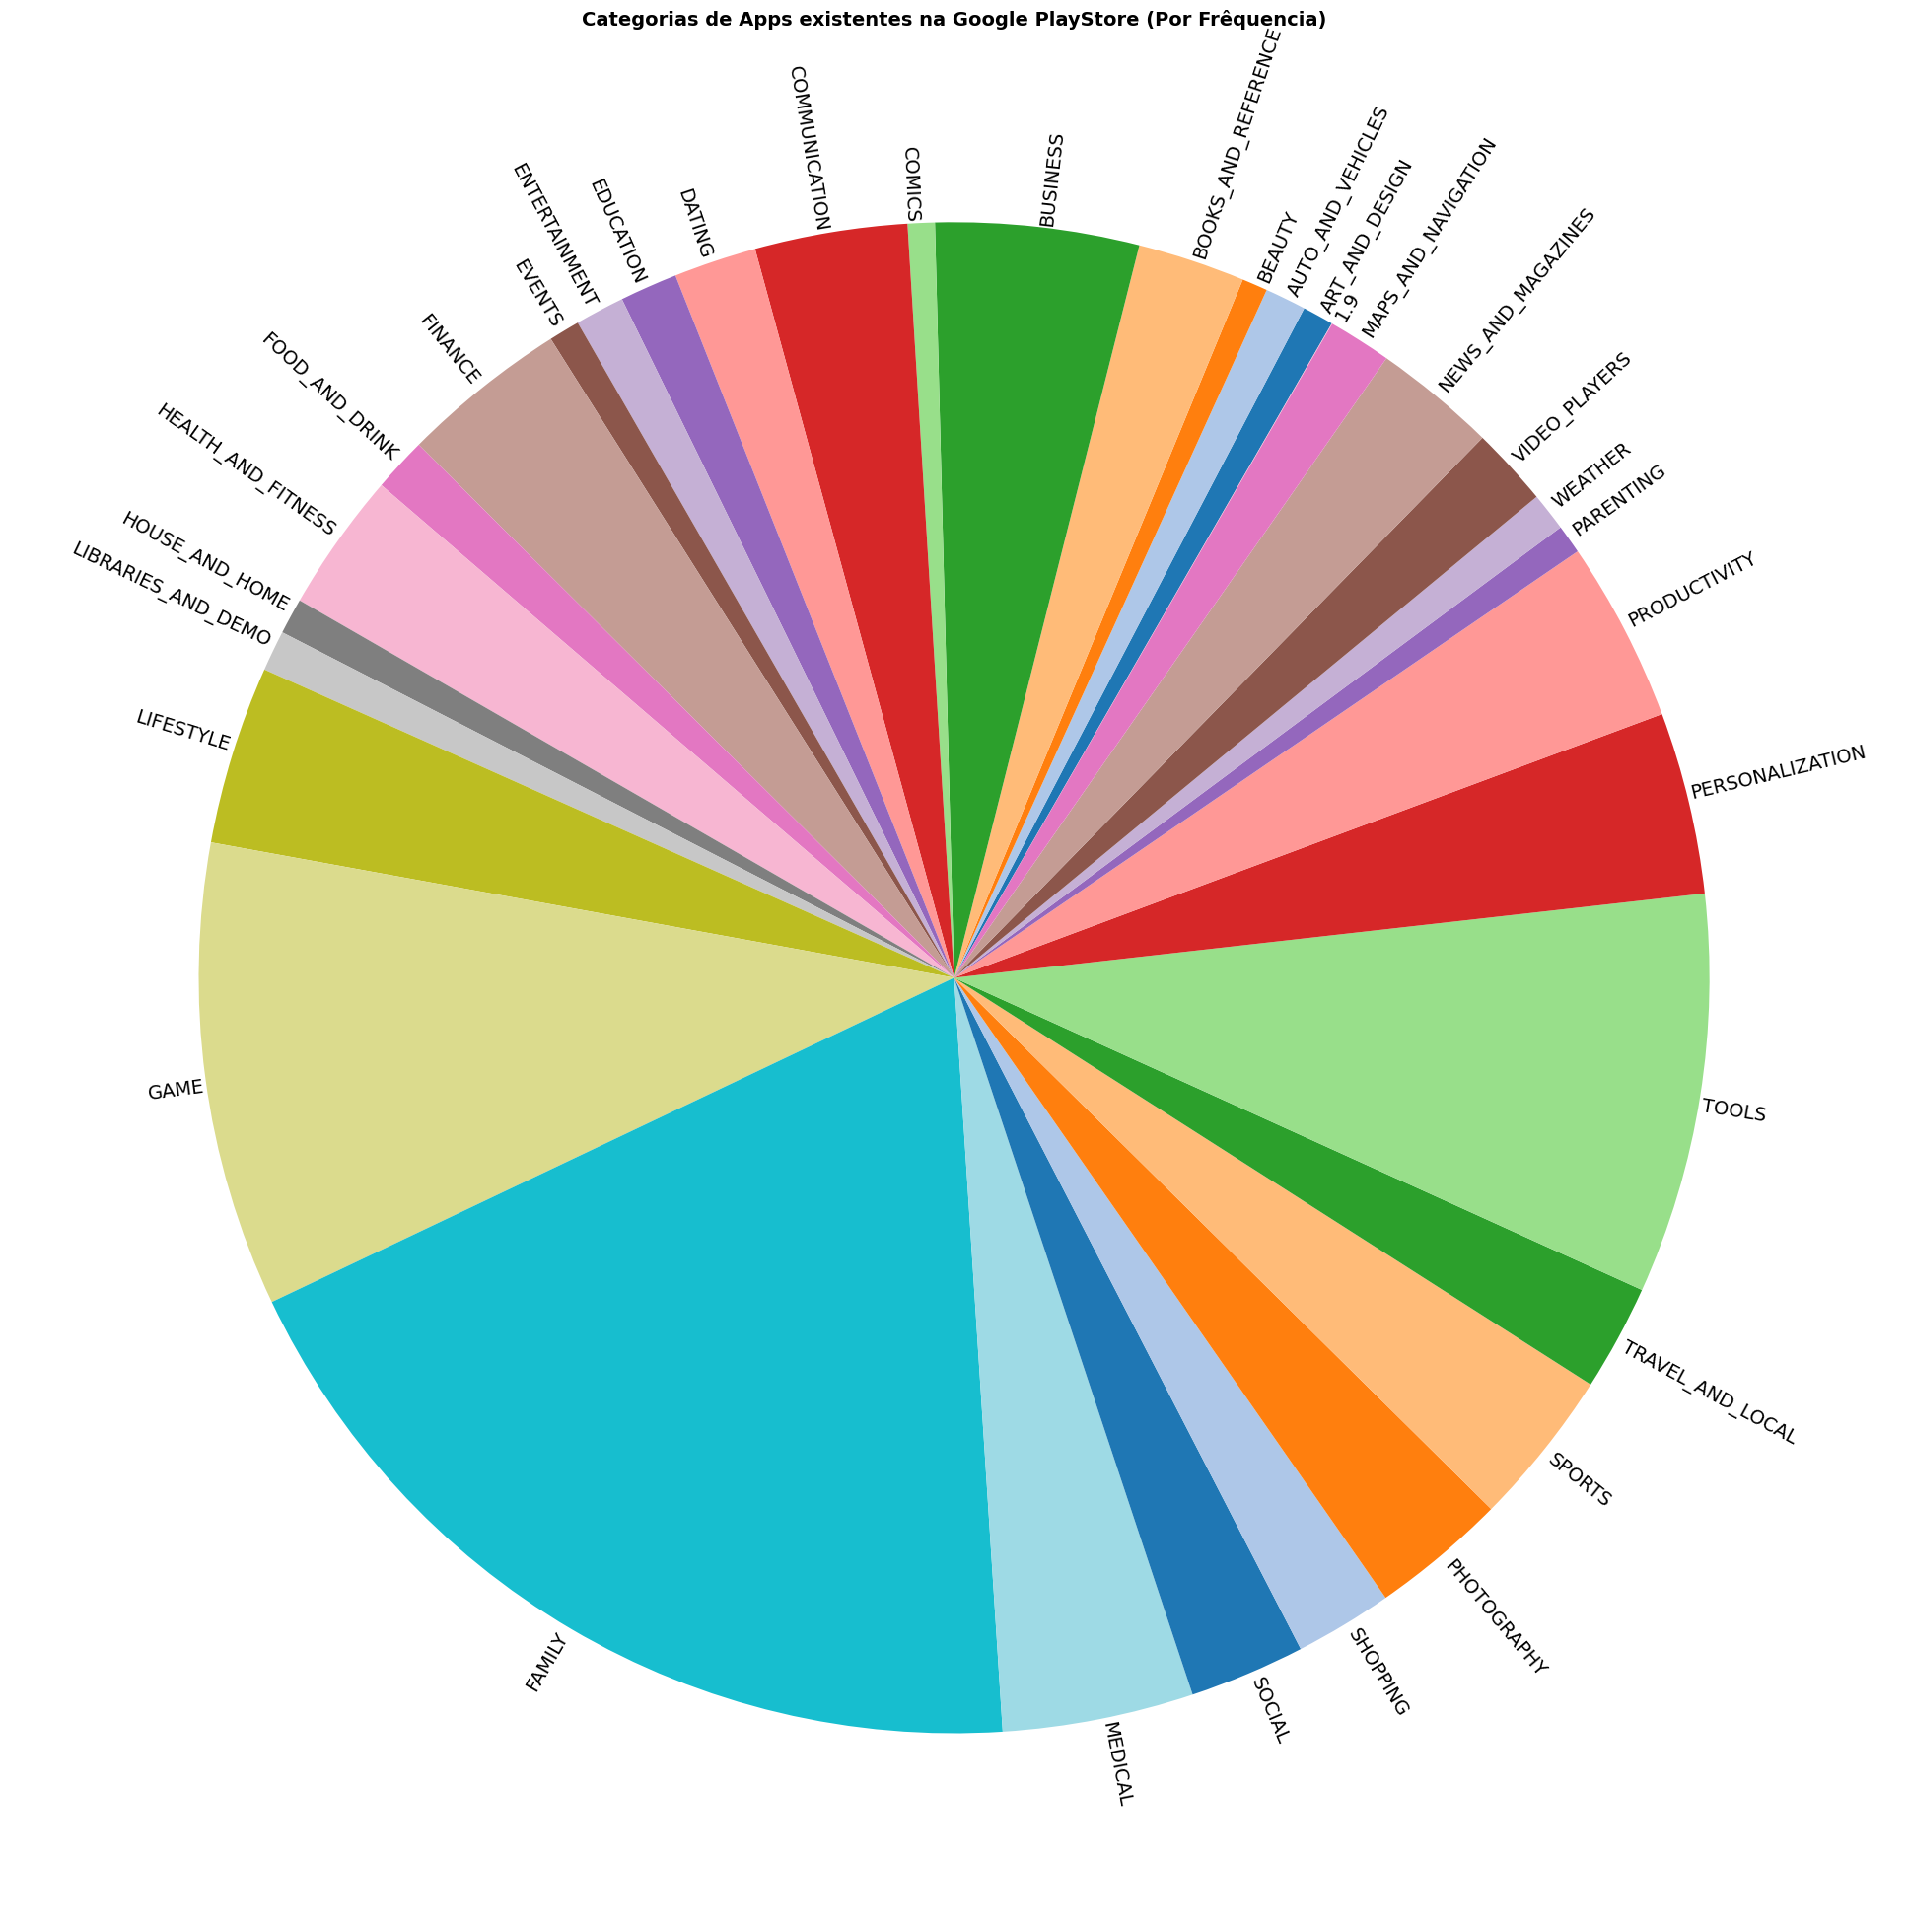

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Utilizo a biblioteca seaborn para criar um paleta de cores que atenda o meu gráfico.
import seaborn as sns

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Crio um dicionário chamado de aparicoes para receber a categoria como key e o número de aparições como Value.
aparicoes = {}

# Passo por todos os valores da coluna Category, caso a categoria já esteja no dicionário como uma key é adcionado 1 ao value da key, 
# caso não, a categoria é adicionada como um key de value 1.
for categorias in dataset['Category']:
    if categorias in aparicoes.keys():
        aparicoes[categorias] += 1
    else:
        aparicoes[categorias] = 1

# Crio uma paleta de cores com o número de chaves do dicionário aparicoes.
num_cores = len(aparicoes)
cores = sns.color_palette('tab20', num_cores)

# Defino a área do gráfico como 100x20.
plt.figure(figsize=(100, 20))

# Defino o título do gráfico, o tamanho da fonte como 14, em negrito.
plt.title('Categorias de Apps existentes na Google PlayStore (Por Frêquencia)', fontsize = 14, fontweight='bold')

# Crio o gráfico pie chart (pizza) e atribuo os values do dicionário aparicoes como conteúdo que preenche o gráfico, cada value terá sua key.
# como label, o ângulo dos labels começam com 60°, 1 de distância do gráfico, com font 14. Também adiciono as cores da paleta ao gráfico.
plt.pie(aparicoes.values(), labels=aparicoes.keys(), startangle=60, labeldistance=1, rotatelabels=True, textprops={'fontsize': 14}, colors=cores)

# Ajusto o gráfico para que ele use a área disponível de forma mais eficiente e faço sua exibição em sequência.
plt.tight_layout()
plt.show()


**Resolução:** Após a execução bem-sucedida, o gráfico de pizza entitulado de *Categorias de Apps existentes na Google PlayStore (Por Frêquencia)* é gerado. Aqui vemos 33 categorias de Apps, quanto maior sua *'fatia'* maior o número de vezes em que a categoria aparece num App. Optei por não usar porcentagens para identificar o gráfico, pois acho que visualmente é a melhor escolha.

### **Etapa 4:**

**O que foi pedido:** Mostre qual o app mais caro existente no dataset.

In [222]:
import pandas as pd

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Converte os conteúdos da coluna Price para númerico, para isso são substituidos caracteres especiais por espaços vazios. Caso algum valor não
# possa ser convertido será substituido por Not a Number, que evita que o programa lance erros ao econtrar valores inválidos.
dataset['Price'] = pd.to_numeric(dataset['Price'].replace('[\$]', '', regex=True), errors='coerce')

# Consigo o maior valor da coluna price e mostrando somente o valor, ignorando o índice e o nome da coluna.
maiorPreco = dataset['Price'].nlargest(1).iloc[0]

# Encontra o índice do maior preço para buscar seu valor relacionado à coluna App.
indiceMaiorPreco = dataset['Price'].idxmax()

# Obtém o conteúdo relacionado ao índice do maior preço à coluna App.
appMaiorPreco = dataset.loc[indiceMaiorPreco, 'App']

# Mostra o resultado final no console.
print(f'O App com o maior preço é: {appMaiorPreco}, por {maiorPreco} $')

# Outra opção para a verifação do resultado é a criação de um arquivo .txt com o resultado.
with open('AppMaisCaro.txt', 'w') as saida:
    saida.write(f'O App com o maior preço é: {appMaiorPreco}, por {maiorPreco} $')

O App com o maior preço é: I'm Rich - Trump Edition, por 400.0 $


**Resolução:** Após a execução bem-sucedida do código, o programa me devolve o resultado do app mais caro existente na Google PlayStore. O resultado pode ser visto, acima, como um exemplo do que seria impresso no console. Mas também criei a opção do resultado ser impresso no arquivo [*AppMaisCaro.txt*](./Sprint3/Desafio/AppMaisCaro.txt).

### **Etapa 5:**

**O que foi pedido:** Mostre quantos apps são classificados como 'Mature 17+'.

In [223]:
import pandas as pd

# Lê o arquivo googleplaystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

quantidade = 0

# Um loop que verifica quantas vezes a string 'Mature 17+' aparece na coluna Content Rating, cada vez que aparece é somado 1 na variável quantidade.
for registros in dataset['Content Rating']:
    if registros == 'Mature 17+':
        quantidade += 1

# Mostra o resultado final no console
print(f'Existem {quantidade} apps que tem como classificação indicativa de Mature 17+.')

# Outra opção para a verifação do resultado é a criação de um arquivo .txt com o resultado.
with open('AppsClassificados.txt', 'w') as saida:
    saida.write(f'Existem {quantidade} apps que tem como classificação indicativa de Mature 17+.')

Existem 393 apps que tem como classificação indicativa de Mature 17+.


**Resultado:** Após a execução bem-sucedida do código, o programa me devolve o resultado do número de vezes que a classificação *Mature 17+*. O resultado pode ser visto, acima, como um exemplo do que seria impresso no console. Mas também criei a opção do resultado ser impresso no arquivo [*AppsClassificados.txt*](./Sprint3/Desafio/AppsClassificados.txt).

### **Etapa 6:**

**O que foi pedido:** Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.

In [224]:
import pandas as pd

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Garanto que todos os valores da coluna Reviews serão numéricos, caso algum valor não possa ser convertido será substituido por Not a Number
# que evita que o programa lance erros ao econtrar valores inválidos.
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'], errors='coerce')

# A variável maiorNumeroReviews recebe os 10 maiores valores contidos na coluna Reviews. (É considerada como um dataframe).
maiorNumeroReviews = dataset.nlargest(10, 'Reviews')

appsMaiorNumReviews = []

# Itera pelas linhas do dataframa maiorNumeroReviews e coleta suas informações: Nome do App e Número de Reviews.
for _, coluna in maiorNumeroReviews.iterrows():
    # Armazena os conteúdos numa tupla que será inserida na lista appsMaiorNumReviews.
    appsMaiorNumReviews.append((coluna['App'], int(coluna['Reviews'])))

# Ordena a lista appsMaiorNumReviews apartir de uma lógica definida, utilizando o segundo elemento de cada item (número de reviews).
# A função sorted é usada para realizar a ordenação, e o parâmetro key define que o critério será o segundo valor (índice 1) de cada tupla.
# O argumento reverse=True indica que a ordenação decrescente.
appsMaiorNumReviews = sorted(appsMaiorNumReviews, key=lambda x: x[1], reverse=True)

# Mostra o resultado final no console.
print('Em ordem decrescente: ', end='\n\n')
for app, reviews in appsMaiorNumReviews:
    print(f'App: {app}, Número de Reviews: {reviews}\n')

# Outra opção para a verifação do resultado é a criação de um arquivo .txt com o resultado.
with open('DezAppsComMaisReviews.txt', 'w') as saida:
    saida.write('Em ordem decrescente:\n\n')
    for app, reviews in appsMaiorNumReviews:
        saida.write(f'App: {app}, Número de Reviews: {reviews}\n')
        

Em ordem decrescente: 

App: Facebook, Número de Reviews: 78158306

App: WhatsApp Messenger, Número de Reviews: 69119316

App: Instagram, Número de Reviews: 66577313

App: Messenger – Text and Video Chat for Free, Número de Reviews: 56642847

App: Clash of Clans, Número de Reviews: 44891723

App: Clean Master- Space Cleaner & Antivirus, Número de Reviews: 42916526

App: Subway Surfers, Número de Reviews: 27722264

App: YouTube, Número de Reviews: 25655305

App: Security Master - Antivirus, VPN, AppLock, Booster, Número de Reviews: 24900999

App: Clash Royale, Número de Reviews: 23133508



**Resolução:** Após a execução bem-sucedida do código, o programa me devolve uma lista de aplicativos e seu devido número de reviews. O resultado pode ser visto, acima, como um exemplo do que seria impresso no console. Mas também criei a opção do resultado ser impresso no arquivo [*DezAppsComMaisReviews*](./Sprint3/Desafio/DezAppsComMaisReviews.txt).

### **Etapa 7:**

**O que foi pedido:** Crie pelo menos mais 2 cálculos sobre o dataset e apresente em um formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e o "app mais caro existente no dataset".

**Escolha 1:** Mostre as 10 datas que tiveram mais atualizações. (Caso mais de um tenha sido atualizado no mesmo dia, usar ordem alfabética)

**Escolha 2:** Qual foi o último app a ser atualizado? Mostre sua data (Caso mais de um tenha sido atualizado no mesmo dia, usar ordem alfabética)

##### **Escolha 1:**

In [6]:
import pandas as pd

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Garante que as aspas duplas serão subtituidas por espaços vazios nos conteúdos armazenados na coluna Last Updated e
# serão convertidos para o tipo DateTime.
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'].replace('"', '', regex=True), errors='coerce')

# Passo por todos os valores da coluna Last Updated, caso a data já esteja no dicionário como uma key, é adcionado 1 ao value da key, 
# caso não, a data é adicionada como um key de value 1.
qtdAtualizacoesPorData = {}
for registros in dataset['Last Updated']:
    if registros in qtdAtualizacoesPorData.keys():
        qtdAtualizacoesPorData[registros] += 1
    else:
        qtdAtualizacoesPorData[registros] = 1

# Ordeno o dicionário apartir de uma lógica definida, utilizando o segundo elemento de cada item (número de atualizações).
# A função sorted é usada para realizar a ordenação, e o parâmetro key define que o critério será o segundo valor (índice 1) de cada tupla.
# O argumento reverse=True indica que a ordenação decrescente.
qtdAtualizacoesPorData = dict(sorted(qtdAtualizacoesPorData.items(), key=lambda item: item[1], reverse=True))

# Crio uma variável que recebe as 10 primeiras datas com mais atualizações, para isso transformo o dicionário 
# qtdAtualizacoesPorData em uma lista que só retorna os 10 primeiros items e depois transformo novamente em um dicionário.
qtdAtualizacoesPorDataSlice = dict(list(qtdAtualizacoesPorData.items())[:10])

# Mostra o resultado final no console.
for data, quantidade in qtdAtualizacoesPorDataSlice.items():
    print(f'Em {data} aconteceram {quantidade} atualizações em diferentes aplicativos', end='\n')

# Outra opção para a verifação do resultado é a criação de um arquivo .txt com o resultado.
with open('DataQuantidadeVezes.txt', 'w') as saida:
    for data, quantidade in qtdAtualizacoesPorDataSlice.items():
        saida.write(f'Em {data} aconteceram {quantidade} atualizações em diferentes aplicativos\n')

Em 2018-08-03 00:00:00 aconteceram 252 atualizações em diferentes aplicativos
Em 2018-08-02 00:00:00 aconteceram 230 atualizações em diferentes aplicativos
Em 2018-08-01 00:00:00 aconteceram 209 atualizações em diferentes aplicativos
Em 2018-07-31 00:00:00 aconteceram 204 atualizações em diferentes aplicativos
Em 2018-07-30 00:00:00 aconteceram 160 atualizações em diferentes aplicativos
Em 2018-07-26 00:00:00 aconteceram 135 atualizações em diferentes aplicativos
Em 2018-07-25 00:00:00 aconteceram 129 atualizações em diferentes aplicativos
Em 2018-07-24 00:00:00 aconteceram 121 atualizações em diferentes aplicativos
Em 2018-07-27 00:00:00 aconteceram 120 atualizações em diferentes aplicativos
Em 2018-08-06 00:00:00 aconteceram 115 atualizações em diferentes aplicativos


**Resolução - Escolha 1:** Após a execução bem-sucedida do código, o programa me devolve uma lista com as 10 datas que tiveram mais atualizações quando os dados foram coletados e a quantidade de atualizações que tiveram. O resultado pode ser visto acima, mas também, como visto no código, criei uma opção de ser visualizado em outro arquivo, no caso o arquivo [*DataQuantidadeVezes.txt*](./Sprint3/Desafio/DataQuantidadeVezes.txt).

##### **Escolha 2:**

In [7]:
import pandas as pd

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Garante que as aspas duplas serão subtituidas por espaços vazios nos conteúdos armazenados na coluna Last Updated e
# serão convertidos para o tipo DateTime.
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'].replace('"', '', regex=True), errors='coerce')

# Garante que as linhas do dataset serão ordenadas por ordem alfabética na coluna App. Dessa forma, ao encontrar o maior 
# valor na coluna Last Updated, o pandas utilizará o menor índice (relacionado à ordem alfabética de App) como 
# critério de desempate em caso de datas iguais.
datasetOrdemAlfabetica = dataset.sort_values(by=['Last Updated', 'App'], ascending=[False, True])

# A variável ultimaData recebe a data da última atualização de um App.
ultimaData = datasetOrdemAlfabetica['Last Updated'].nlargest(1).iloc[0]

# Uso loc para descobrir a localização da linha onde se encontra a última data de atualização, por meio do método idxmax.
ultimoApp = datasetOrdemAlfabetica.loc[datasetOrdemAlfabetica['Last Updated'].idxmax()]

# Armazeno o conteúdo que se encontrava na linha da última data relacionado a coluna App.
ultimoAppAtualizado = ultimoApp['App']

# Será impresso no console o resultado (Por padrão a data estará no formato YY-MM-DD).
print(f'O app {ultimoAppAtualizado} foi o último aplicativo da Google PlayStore a ser atualizado! Foi atualizado em: {ultimaData}')

# Outra opção para a verifação do resultado é a criação de um arquivo .txt com o resultado.
with open('DataUltimaAtualizacaoApp.txt', 'w') as saida:
    saida.write(f'O app {ultimoAppAtualizado} foi o último aplicativo da Google PlayStore a ser atualizado! Foi atualizado em: {ultimaData}')
    

O app BankNordik foi o último aplicativo da Google PlayStore a ser atualizado! Foi atualizado em: 2018-08-08 00:00:00


**Resolução - Escolha 2:** Após a execução bem-sucedida do código, o programa me devolve o App que foi atualizado na última data presente no dataset. Entretanto vimos no exercíco anterior que 252 aplicativos atualizaram na última data, então como critério de desempate utilizo a ordem alfabética. O resultado final pode ser visto acima, ou no arquivo [*DataUltimaAtualizacaoApp.txt*](./Sprint3/Desafio/DataUltimaAtualizacaoApp.txt).

### **Etapa 8:**

**O que foi pedido:** Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. Escolha tipos gráficos diferentes dos explorados acima. Por exemplo: linhas e dispersão.

**Escolha 1:** Exibir novamente o conteúdo do gráfico da **ETAPA 3** uma vez que não achei que o pie chart era a melhor forma de demonstrar quais categorias de apps existiam no dataset de acordo com sua frequência.

**Escolha 2:** Criar um gráfico das instruções pedidas na **ETAPA 6**: *Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.*

#### **Escolha 1:**

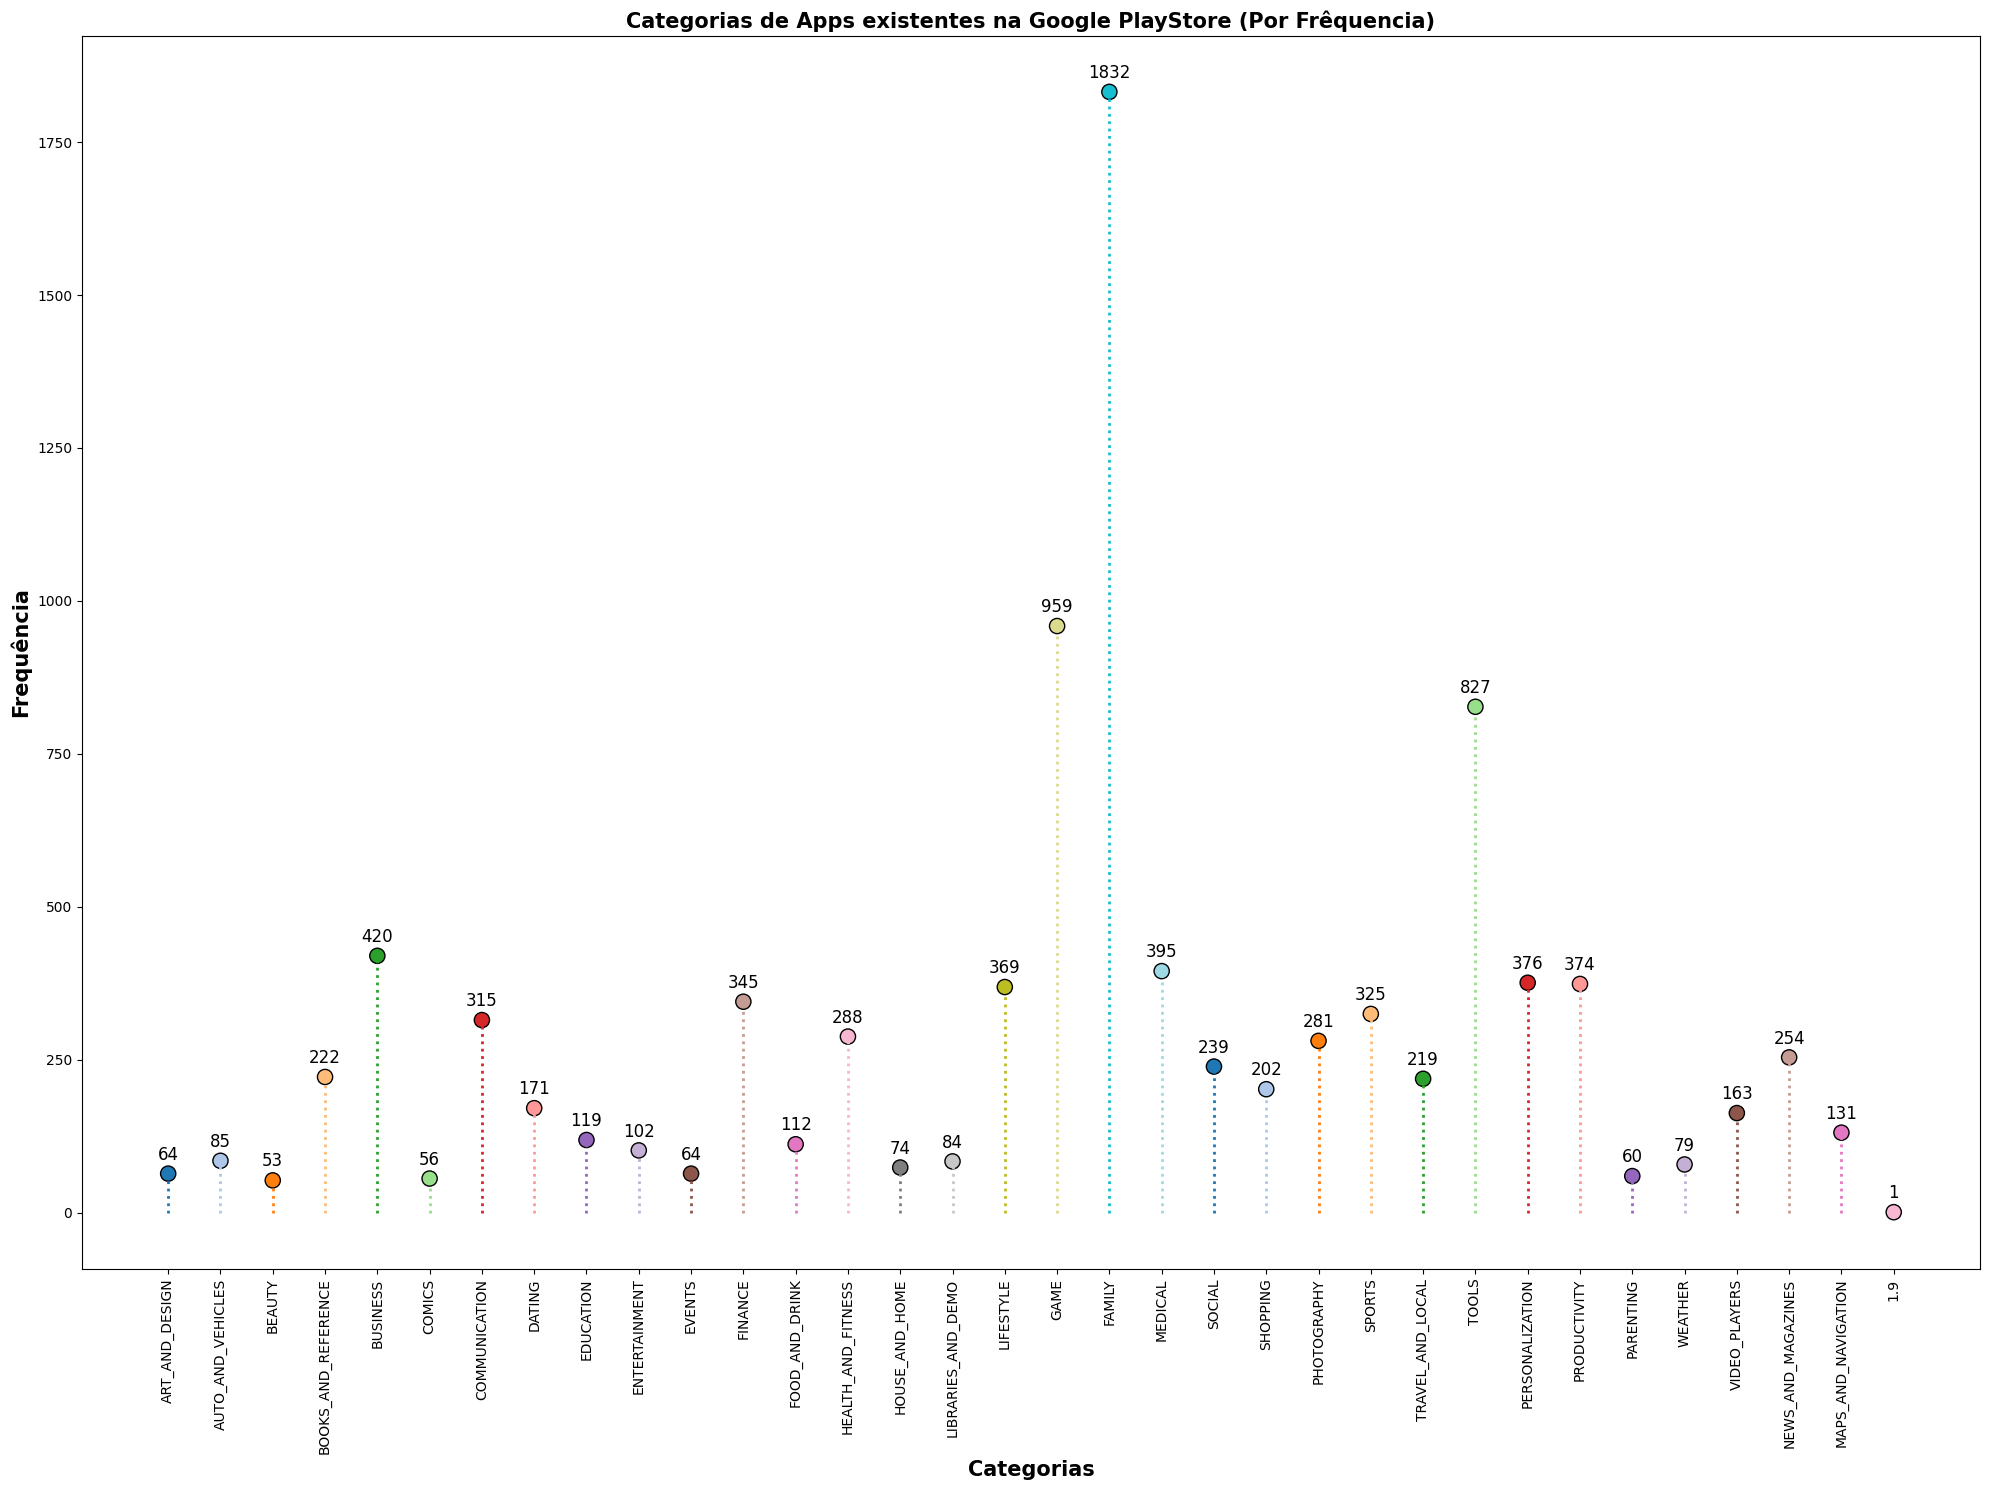

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Utilizo a biblioteca seaborn para criar um paleta de cores que atenda o meu gráfico.
import seaborn as sns

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Crio um dicionário chamado de aparicoes para receber a categoria como key e o número de aparições como Value.
aparicoes = {}

# Passo por todos os valores da coluna Category, caso a categoria já esteja no dicionário como uma key é adcionado 1 ao value da key, 
# caso não, a categoria é adicionada como um key de value 1.
for categorias in dataset['Category']:
    if categorias in aparicoes.keys():
        aparicoes[categorias] += 1
    else:
        aparicoes[categorias] = 1


# Crio uma paleta de cores com o número de chaves do dicionário aparicoes.
num_cores = len(aparicoes)
cores = sns.color_palette('tab20', num_cores)

# Defino a área do gráfico com 20x15.
plt.figure(figsize=(20, 15))

# Defino o título do gráfico, o tamanho de sua fonte 15, em negrito.
plt.title('Categorias de Apps existentes na Google PlayStore (Por Frêquencia)', fontsize = 15, fontweight='bold')

# Crio o gráfico de disperção, com os valores do eixo X sendo as keys contidas no dicionário aparicoes, 
# os valores do eixo Y sendo os values contidos no dicionário aparicoes.
# Defino as cores dos pontos, com base na paleta criada anteriormente, seu contorno como preto e seu tamanho como 120.
plt.scatter(aparicoes.keys(), aparicoes.values(), color=cores, edgecolors='black', s=120)

cont = 0
# Defino neste loop as linhas pontilhadas que ligam as categorias às suas frequências.
for categoria, valor in aparicoes.items():
    # A linha deve começar nas coordenas (x, y), sendo um X fixo (Categoria = aparicoes.keys()) e 
    # y começando do 0 indo até o seu valor (Valor = aparicoes.value()).
    # Defino uma cor diferente a cada iteração, tal qual o estilo da linha e sua grossura.
    plt.vlines(x=categoria, ymin=0, ymax=valor, colors=cores[cont], linestyles=':', linewidth=2)
    cont += 1
    
# Defino neste loop a frequêcia de cada categoria nos seus pontos do gráfico.
for categoria, valor in aparicoes.items():
    # O valor (Valor = aparicoes.value()) é anotado nas coordenadas (X=Categoria(keys), Y=Valor(values)).
    # Defino que a posição do texto será ajustada em relação às coordenadas especificadas, posicionp +10 no eixo y, 
    # centralizo o texto e defino o tamanho da fonte como 12.
    plt.annotate(f'{valor}', (categoria, valor), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)

# Defino o texto dos labels X (Categorias) e Y (Frequência), com tamanho da fonte 15 em negrito.
plt.xlabel('Categorias', fontsize = 15, fontweight='bold')
plt.ylabel('Frequência', fontsize = 15, fontweight='bold')

# Defino que os labels de cada valor do eixo X devem estar com uma rotação de 90°.
plt.xticks(rotation=90)

# Ajusto o gráfico para que ele use a área disponível de forma mais eficiente e faço sua exibição em sequência.
plt.tight_layout()
plt.show()

**Resolução - Escolha 1:** Como mencionado anteriormente, não considerei a escolha do gráfico de pizza ideal para resolver o problema. Por isso, decidi recriar o gráfico de uma forma mais clara e visualmente agradável para quem estiver analisando os dados. O gráfico gerado é de dispersão, com o eixo X representando as categorias dos aplicativos e o eixo Y representando a frequência com que cada categoria aparece. As cores foram adicionadas para facilitar a visualização e a diferenciação entre as categorias. Além disso, as linhas pontilhadas foram incluídas para que o leitor possa identificar com facilidade a categoria à qual cada valor está associado.

##### **Escolha 2:**

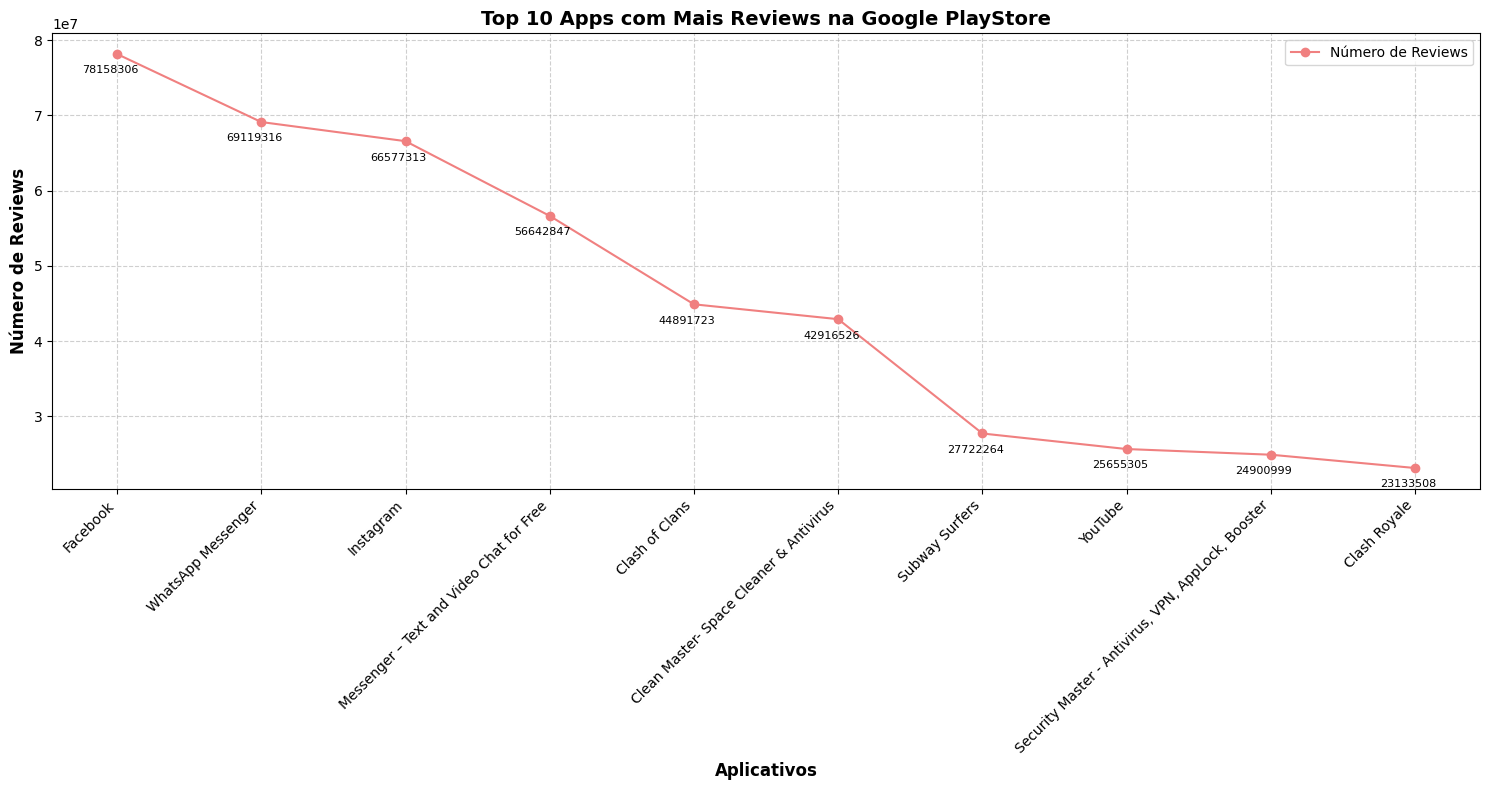

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset.
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Garante que todos os valores da coluna Reviews sejam numéricos.
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'], errors='coerce')

# Obtém os 10 maiores valores da coluna Reviews.
maiorNumeroReviews = dataset.nlargest(10, 'Reviews')

appsMaiorNumReviews = []

# Itera pelas linhas de maiorNumeroReviews e coleta Nome do App e Número de Reviews.
for _, coluna in maiorNumeroReviews.iterrows():
    appsMaiorNumReviews.append((coluna['App'], int(coluna['Reviews'])))

# Ordena a lista em ordem decrescente pelo número de reviews.
appsMaiorNumReviews = sorted(appsMaiorNumReviews, key=lambda x: x[1], reverse=True)

# Divide os dados para o gráfico.
nomesApps = [app[0] for app in appsMaiorNumReviews]
numReviews = [app[1] for app in appsMaiorNumReviews]

# Defino a área do gráfico com 10x6.
plt.figure(figsize=(15, 8))

# Crio o gráfico de linha, com os valores do eixo X sendo os valores armazenados em nome_apps e os valores do 
# eixo Y sendo os valores armazenado nem num_reviews.
# Defino os marcadores com 'o', o tipo de linha, a cor da linha e a legenda para a linha.
plt.plot(nomesApps, numReviews, marker='o', linestyle='-', color='lightcoral', label='Número de Reviews')

# Adicionando anotações acima dos pontos.
for app, quantidade in zip(nomesApps, numReviews):
    # A quantidade instalações dos apps é anotado nas coordenadas (X = Apps, Y=Quantidade).
    # Defino que a posição do texto será ajustada em relação às coordenadas especificadas, posiciono -5 no eixo X e -14 no eixo Y,
    # centralizo o texto e defino o tamnho da fonte como 8.
    plt.annotate(f'{quantidade}', (app, quantidade), textcoords="offset points", xytext=(-5, -14), ha='center',  fontsize=8)

# Defino o título do gráfico, o tamanho de sua fonte 14, em negrito.
plt.title('Top 10 Apps com Mais Reviews na Google PlayStore', fontsize=14, fontweight='bold')

# Defino os labels do eixo X e Y com tamanho de fonte 12 em negrito.
plt.xlabel('Aplicativos', fontsize=12, fontweight='bold')
plt.ylabel('Número de Reviews', fontsize=12, fontweight='bold')

# Os valores do eixo X são colocados a 45° e a direita, para que eles fiquem alinhados e não sobrepostos.
plt.xticks(rotation=45, ha='right') 

# Ativa a grade do gráfico, que pode facilitar a visualização das informações.
plt.grid(True, linestyle='--', alpha=0.6)

# Garante a legenda no gráfico.
plt.legend()

# Mostrando o gráfico.
plt.tight_layout()
plt.show()


**Resolução - Escolha 2:** Para diversificar, utilizei um gráfico que ainda não havia sido explorado anteriormente. Escolhi a questão da **ETAPA 6** porque ela trouxe números interessantes, envolvendo dez aplicativos diferentes. Essa foi uma questão desafiadora, pois precisei voltar ao início e corrigir o arquivo googleplaystoreAtt.csv.

Neste gráfico, optei por uma abordagem simples, garantindo que os rótulos dos eixos X e Y fossem claros e intuitivos, facilitando a extração de informações. O título foi cuidadosamente pensado para situar o leitor no contexto do gráfico. Além disso, incluí os nomes dos aplicativos e o número de reviews logo abaixo dos pontos no gráfico, permitindo uma coleta de dados precisa e visualmente acessível.